### Assessing

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_red = pd.read_csv('winequality-red.csv', sep=';')

In [161]:
# red_df.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

In [162]:
df_red.shape

(1599, 12)

In [163]:
sum(df_red.duplicated())

240

In [164]:
df_red['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [165]:
df_white = pd.read_csv('winequality-white.csv', sep=';')

In [166]:
df_white.shape

(4898, 12)

In [167]:
sum(df_white.duplicated())

937

In [168]:
df_white['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

### How fast is NumPy?

In [169]:
a = np.random.random((int)(1e8))

In [170]:
import time

start = time.time()
sum(a) / len(a)
print(time.time() - start, 'seconds')

22.290226697921753 seconds


In [171]:
start = time.time()
np.mean(a)
print(time.time() - start, 'seconds')

0.16791772842407227 seconds


### Steps to combine DataFrames

In [172]:
# create color array for red dataframe
color_red = np.repeat('red', 1599)

# create color array for white dataframe
color_white = np.repeat('white', 4898)

In [173]:
df_red['color'] = color_red
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [174]:
df_white['color'] = color_white
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [175]:
# append dataframes
wine_df = df_red.append(df_white, ignore_index= True, sort=False)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [176]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


### Saving combined DataFrame

In [177]:
wine_df.to_csv('winequality_edited.csv', index=False)

In [178]:
wine_df.shape

(6497, 13)

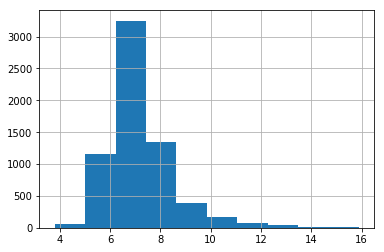

In [179]:
wine_df['fixed acidity'].hist()

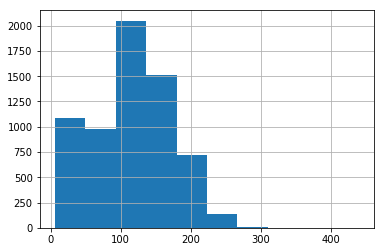

In [180]:
wine_df['total sulfur dioxide'].hist()

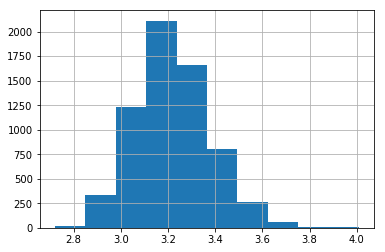

In [181]:
wine_df['pH'].hist()

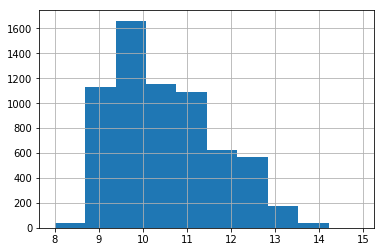

In [182]:
wine_df['alcohol'].hist()

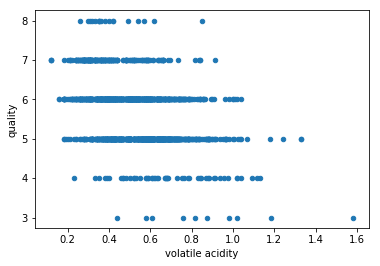

In [183]:
df.plot(x="volatile acidity", y="quality", kind="scatter");

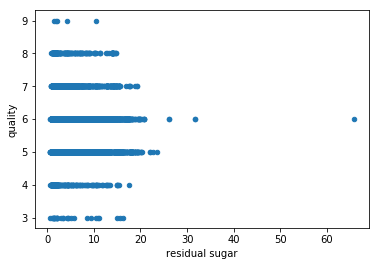

In [184]:
wine_df.plot(x='residual sugar', y='quality', kind='scatter');

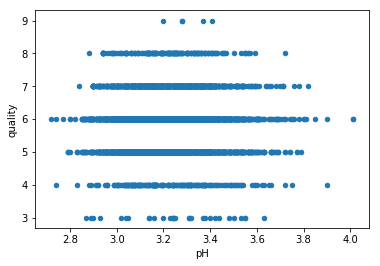

In [185]:
wine_df.plot(x='pH', y='quality', kind='scatter');

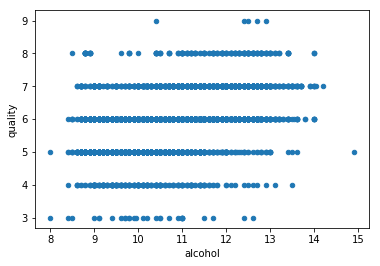

In [186]:
wine_df.plot(x='alcohol', y='quality', kind='scatter');

In [187]:
wine_df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

### Drawing Conclusions Using Groupby

In [188]:
wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [189]:
wine_df.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [190]:
# if only interested in fixed pH
wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


### Is a certain type of wine associated with higher quality?

In [191]:
wine_df[wine_df['color'] == 'red']['quality'].mean()

5.6360225140712945

In [192]:
wine_df[wine_df['color'] == 'white']['quality'].mean()

5.87790935075541

In [193]:
# Find the mean quality of each wine type (red and white) with groupby
wine_df.groupby(['color'], as_index=False)['quality'].mean()

,color,quality
0,red,5.636023
1,white,5.877909


### What level of acidity receives the highest average rating?

In [218]:
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [219]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found

In [220]:
# Labels for the four acidity level groups
bin_names = ['Low', 'Medium', 'Moderately High', 'High'] # Name each acidity level category

In [221]:
# Creates acidity_levels column
wine_df['acidity levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,High
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Moderately High
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,High


In [222]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby(['acidity levels'], as_index=False)['quality'].mean()

,acidity levels,quality
0,Low,5.692308
1,Medium,5.676157
2,Moderately High,5.670429
3,High,5.588798


In [223]:
wine_df.groupby('acidity levels').mean().quality

acidity levels
Low                5.692308
Medium             5.676157
Moderately High    5.670429
High               5.588798
Name: quality, dtype: float64

In [230]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = wine_df.groupby('acidity levels').quality.mean()
acidity_level_quality_means

acidity levels
Low                5.692308
Medium             5.676157
Moderately High    5.670429
High               5.588798
Name: quality, dtype: float64

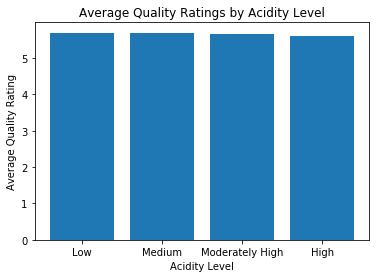

In [231]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]  # reorder values above to go from low to high
heights = acidity_level_quality_means

labels = ['Low', 'Medium', 'Moderately High', 'High']
# labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

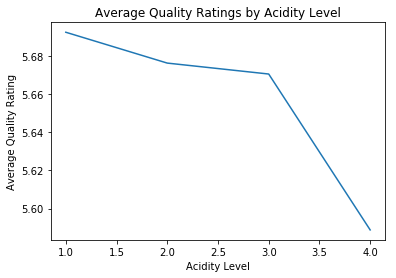

In [232]:
plt.plot(locations, heights)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

In [200]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

### Do wines with higher alcoholic content receive better ratings?

In [201]:
# get the median amount of alcohol content
wine_df['alcohol'].median()

10.3

In [202]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.30')

# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.30')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [203]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

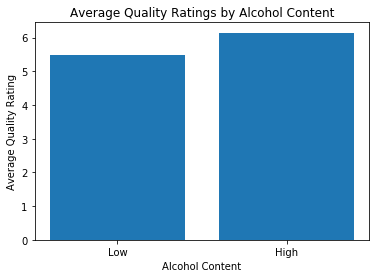

In [211]:
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Do sweeter wines receive better ratings?¶

In [204]:
# get the median amount of residual sugar
wine_df['residual sugar'].median()

3.0

In [205]:
# select samples with residual sugar less than the median
low_sugar = wine_df[wine_df['residual sugar'] < 3]

# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df[wine_df['residual sugar'] >= 3]

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [206]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

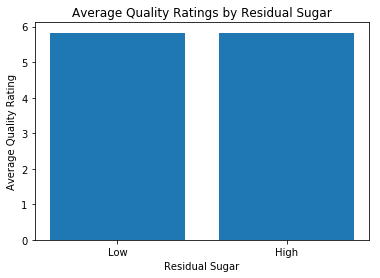

In [212]:
mean_quality_low = low_sugar['quality'].mean()
mean_quality_high = high_sugar['quality'].mean()

# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

Text(0, 0.5, 'Quality')

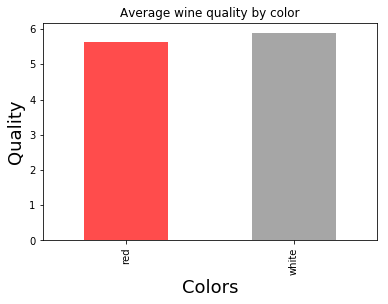

In [235]:
colors = ['red', 'grey']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Average wine quality by color', color = colors, alpha=0.7)
plt.xlabel('Colors', fontsize = 18)
plt.ylabel('Quality', fontsize = 18)

In [236]:
counts = wine_df.groupby(['quality', 'color']).count()
counts

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity levels  
quality color                                            
3       red      10         10       10              10  
        white    20         20       20               0  
4       red      53         53       53              53  
        white   163        163      163               0  
5       red     681        681      681             681  
        white  1457       1457     1457               0  
6       red     638        638      638             638  
        white  2198       2198     2198               0  
7       red     199        199      199             199  
        white   880        880      880               0  
8       red      18         18       18              18  
        white   175        175      175               0  
9       white     5          5        5               0

Text(0, 0.5, 'Count')

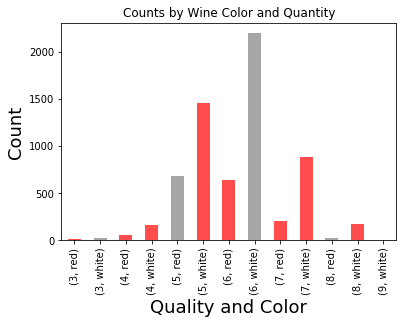

In [237]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', title='Counts by Wine Color and Quantity', color = colors, alpha=0.7)
plt.xlabel('Quality and Color', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

Text(0, 0.5, 'Proportion')

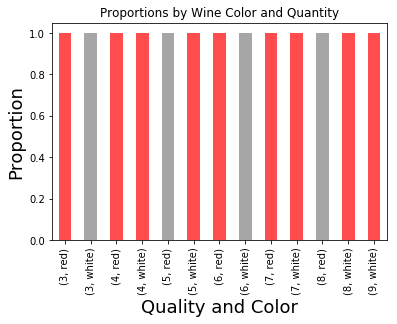

In [239]:
totals = wine_df.groupby(['quality', 'color']).count()['pH']
proportions = counts / totals
proportions.plot(kind='bar', title='Proportions by Wine Color and Quantity', color = colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize = 18)
plt.ylabel('Proportion', fontsize = 18)